In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score


In [7]:
df=pd.read_csv("heart_disease_data.csv")
df.drop(columns="PatientID",inplace=True)
df

,Age,Gender,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,67,Male,Asymptomatic,131,287,1,LVH,69,No,0.0,Up,1
1,57,Male,Atypical,147,156,1,ST,187,Yes,2.3,Up,1
2,43,Male,Non-anginal,101,119,1,ST,158,No,3.4,Up,1
3,71,Female,Typical,92,372,1,LVH,171,Yes,2.9,Up,1
4,36,Female,Non-anginal,107,218,0,LVH,119,No,5.2,Up,1
...,...,...,...,...,...,...,...,...,...,...,...,...
795,58,Female,Non-anginal,110,261,1,LVH,129,Yes,3.7,Up,1
796,45,Female,Atypical,163,199,0,ST,103,Yes,1.8,Down,1
797,76,Female,Asymptomatic,127,240,0,ST,145,Yes,5.4,Up,0
798,75,Female,Atypical,135,182,1,Normal,78,Yes,3.8,Flat,1


In [8]:
label=LabelEncoder()
for i in df.select_dtypes(include=["object"]):
    df[i]=label.fit_transform(df[i])
df

,Age,Gender,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,67,1,0,131,287,1,0,69,0,0.0,2,1
1,57,1,1,147,156,1,2,187,1,2.3,2,1
2,43,1,2,101,119,1,2,158,0,3.4,2,1
3,71,0,3,92,372,1,0,171,1,2.9,2,1
4,36,0,2,107,218,0,0,119,0,5.2,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
795,58,0,2,110,261,1,0,129,1,3.7,2,1
796,45,0,1,163,199,0,2,103,1,1.8,0,1
797,76,0,0,127,240,0,2,145,1,5.4,2,0
798,75,0,1,135,182,1,1,78,1,3.8,1,1


In [9]:
X=df[["Age","Cholesterol"]].values
y=df["HeartDisease"].values

In [10]:
scalar=StandardScaler()
scu=scalar.fit_transform(X)
scu

array([[ 1.04365764,  0.48677637],
       [ 0.31369951, -1.07961284],
       [-0.70824188, -1.52202811],
       ...,
       [ 1.70061996, -0.0752106 ],
       [ 1.62762415, -0.76872643],
       [-0.12427537,  0.35524751]], shape=(800, 2))

In [11]:
x_train,x_test,y_train,y_test=train_test_split(scu,y,test_size=0.2,random_state=42)

accuracy score of linear:65.62%


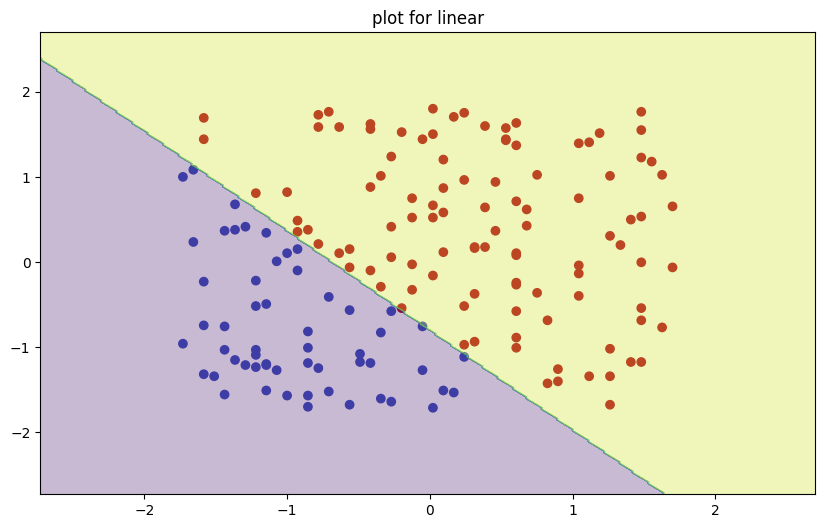

accuracy score of poly:61.88%


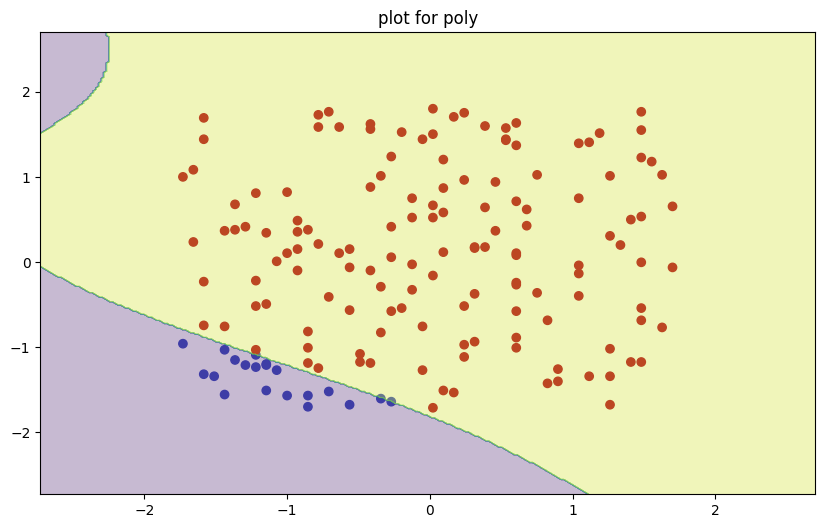

accuracy score of rbf:71.88%


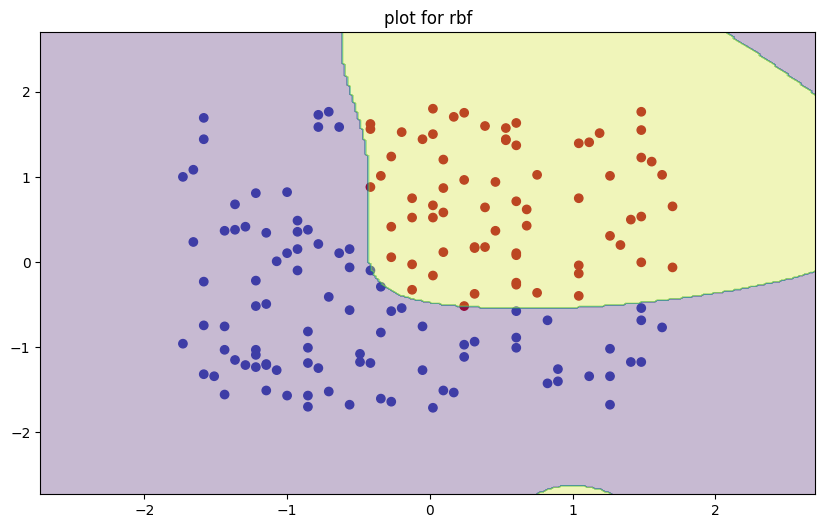

accuracy score of sigmoid:65.00%


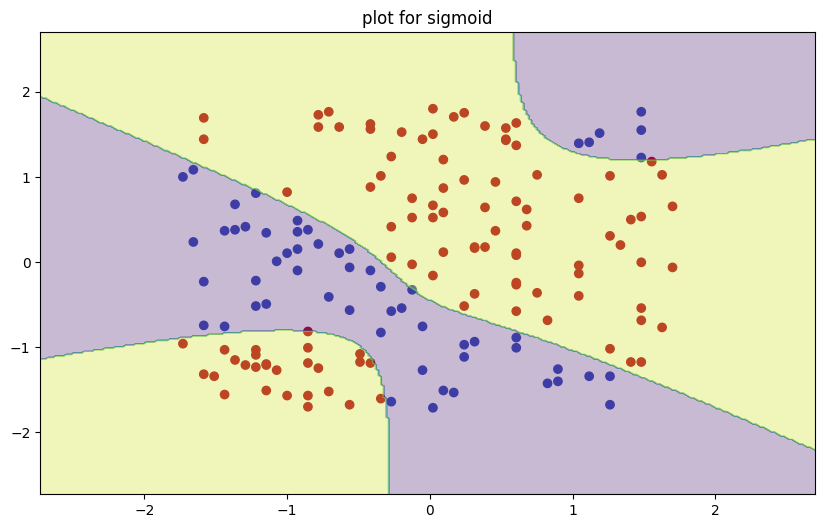

In [12]:
kernal=["linear","poly","rbf","sigmoid"]
for i in kernal:
    svm=SVC(kernel=i,degree=3,gamma="auto")
    svm.fit(x_train,y_train)
    y_pred=svm.predict(x_test)
    y_pred
    acc=accuracy_score(y_test,y_pred)
    print(f"accuracy score of {i}:{acc*100:.2f}%")

    plt.figure(figsize=[10,6])
    plt.scatter(x_test[:, 0],x_test[:, 1],c=y_pred,cmap="coolwarm")
    x_min,x_max=x_test[:, 0].min()-1 ,x_test[:, 0].max()+1
    y_min,y_max=x_test[:, 1].min()-1 ,x_test[:, 1].max()+1
    xx,yy=np.meshgrid(np.linspace(x_min,x_max,300),np.linspace(x_min,x_max,300))
    z=svm.predict(np.c_[xx.ravel(),yy.ravel()])
    plt.contourf(xx,yy,z.reshape(xx.shape),alpha=0.3)
    plt.title(f"plot for {i}")
    plt.show()


In [13]:
new=np.array([[32.980285,19912.928365]])
scu=scalar.transform(new)
a=svm.predict(scu)
a

array([1])